In [15]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [16]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1, parser='auto')

print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [17]:
X_all, y_all = mnist['data'].to_numpy(), mnist['target'].to_numpy()

In [18]:
y_all_i = np.ndarray(shape=y_all.shape)
for i in range(70000):
    y_all_i[i]=int(y_all[i])

# Training data
X_train=X_all[:1000]
y_train=y_all[:1000]

# Test data
X_test=X_all[1000:]
y_test=y_all[1000:]
y_test_i=y_all_i[1000:]


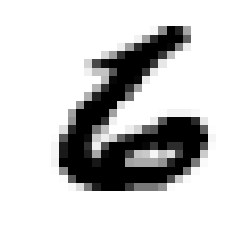

In [19]:
some_digit=X_all[-1]
some_digit_image=some_digit.reshape(28, 28)

plt.figure(figsize=(3,3))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [20]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, 10))

    for i in range(y.size):
        j = int(y[i])
        one_hot_y[i][j] = 1
    return one_hot_y

In [21]:
def softmax(z):
    z = z - z.max()
    return np.exp(z) / np.sum(np.exp(z))


# softmax for matrices
def softmax_m(Z):
    sm = np.ndarray(shape=(Z.shape))
    for i in range(Z.shape[0]):
        sm[i]=softmax(Z[i])
    return sm

In [22]:
X = X_train
y = one_hot(y_train)

In [23]:
# Batch/Full Gradient descent

eta = 0.1 #learning rate
n_iterations = 500

m = 1000

W = np.random.rand(784, 10) -0.5
b = np.random.rand(1,   10) -0.5

for iteration in range(n_iterations):
    
    p = softmax_m(X.dot(W) + b)

    W_grad = 1/m*X.T.dot(p-y)
    b_grad = 1/m*np.sum(p-y)

    W-= eta*W_grad
    b-= eta*b_grad

In [24]:
y_proba = softmax_m(X_test.dot(W) + b)

y_pred = np.argmax(y_proba, axis=1)

# Accuracy
np.sum(y_pred==y_test_i)/y_test_i.size

0.8316811594202899

In [25]:
W

array([[-0.12545988,  0.45071431,  0.23199394, ...,  0.36617615,
         0.10111501,  0.20807258],
       [-0.47941551,  0.46990985,  0.33244264, ...,  0.02475643,
        -0.06805498, -0.20877086],
       [ 0.11185289, -0.36050614, -0.20785535, ...,  0.01423444,
         0.09241457, -0.45354959],
       ...,
       [-0.27690998, -0.44348431, -0.39660506, ...,  0.4405373 ,
         0.40594397,  0.06680611],
       [-0.14557601, -0.11885312, -0.08814772, ..., -0.16405385,
         0.06069448, -0.40494346],
       [-0.29953095, -0.08653423, -0.29379728, ...,  0.19186391,
        -0.11693063,  0.36909907]])

In [26]:
# Softmax using library

from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1000)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=1000, multi_class='multinomial', solver='newton-cg')

In [27]:
np.sum(softmax_reg.predict(X_test)==y_test)/y_test.size

0.8403333333333334

lbfgs relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.

sag faster than other solvers for large datasets, when both the number of samples and the number of features are large.

saga the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.

newton-cg computationally expensive because of the Hessian Matrix.

liblinearrecommended when you have a high dimension dataset - solving large-scale classification problems.